In [581]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [582]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [583]:
df = pd.read_csv('/content/drive/MyDrive/ML Engineer BS/Online Retail Data Set.csv', encoding='ISO-8859-1')

In [584]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [586]:
# df.describe(include='all')
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [587]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [588]:
duplicates = df.duplicated().sum()

print(f"Dataset has {duplicates} duplicate rows.")


Dataset has 5268 duplicate rows.


In [589]:
percentage_duplicated_orders = (duplicates / len(df)) * 100

print(f"Total percentage of duplicated orders: {percentage_duplicated_orders:.2f}%")

Total percentage of duplicated orders: 0.97%


In [590]:
df.drop_duplicates(inplace=True)

In [591]:
trows, tcolumns = df.shape

print(f"Dataset has {trows} rows and {tcolumns} columns after removing duplicates.")

Dataset has 536641 rows and 8 columns after removing duplicates.


In [592]:
duplicate_counts = {}

for col in df.columns:
    duplicate_counts[col] = df.duplicated(subset=[col]).sum()

print("Duplicate Value Counts:")
for col, count in duplicate_counts.items():
    print(f"{col}: {count}")


Duplicate Value Counts:
InvoiceNo: 510741
StockCode: 532571
Description: 532417
Quantity: 535919
InvoiceDate: 513381
UnitPrice: 535011
CustomerID: 532268
Country: 536603


In [593]:
unique_counts = {}

for col in df.columns:
    unique_counts[col] = df[col].nunique()

print("Unique Value Counts:")
for col, count in unique_counts.items():
    print(f"{col}: {count}")

Unique Value Counts:
InvoiceNo: 25900
StockCode: 4070
Description: 4223
Quantity: 722
InvoiceDate: 23260
UnitPrice: 1630
CustomerID: 4372
Country: 38


In [594]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [595]:
negative_quantity = df[df['Quantity'] <= 0]

negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [596]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom,54.08


In [597]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom,54.08


In [598]:
num_negative_total_price = (df['TotalPrice'] < 0).sum()

print("Number of negative TotalPrice:", num_negative_total_price)

Number of negative TotalPrice: 9253


In [599]:
percentage_canceled_orders = (len(df[df['TotalPrice'] <= 0]) / len(df)) * 100

print(f"Total percentage of canceled orders: {percentage_canceled_orders:.2f}%")

Total percentage of canceled orders: 2.19%


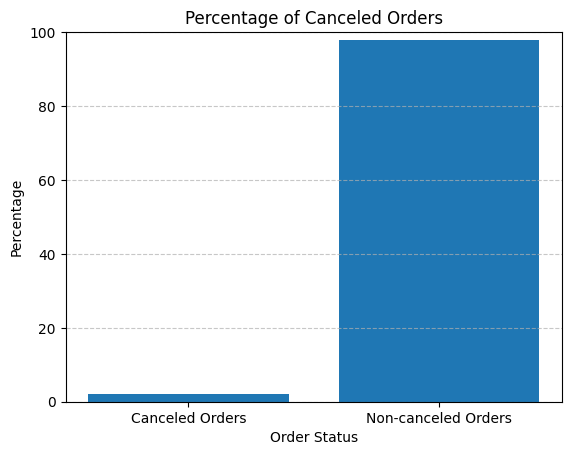

In [600]:
plt.bar(['Canceled Orders', 'Non-canceled Orders'], [percentage_canceled_orders, 100 - percentage_canceled_orders])
plt.xlabel('Order Status')
plt.ylabel('Percentage')
plt.title('Percentage of Canceled Orders')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [601]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [602]:
df.InvoiceDate.min(),df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

<ipython-input-603-dad5f70edfe9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='InvoiceDate', y='TotalPrice', palette='viridis')


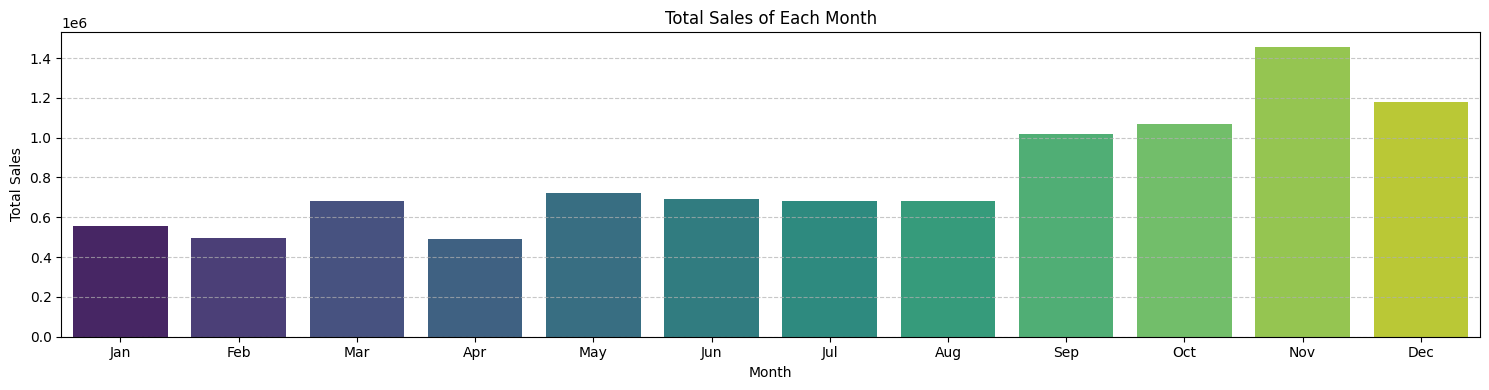

In [603]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y')

monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['TotalPrice'].sum().reset_index()

plt.ion()

plt.figure(figsize=(15, 4))
sns.barplot(data=monthly_sales, x='InvoiceDate', y='TotalPrice', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


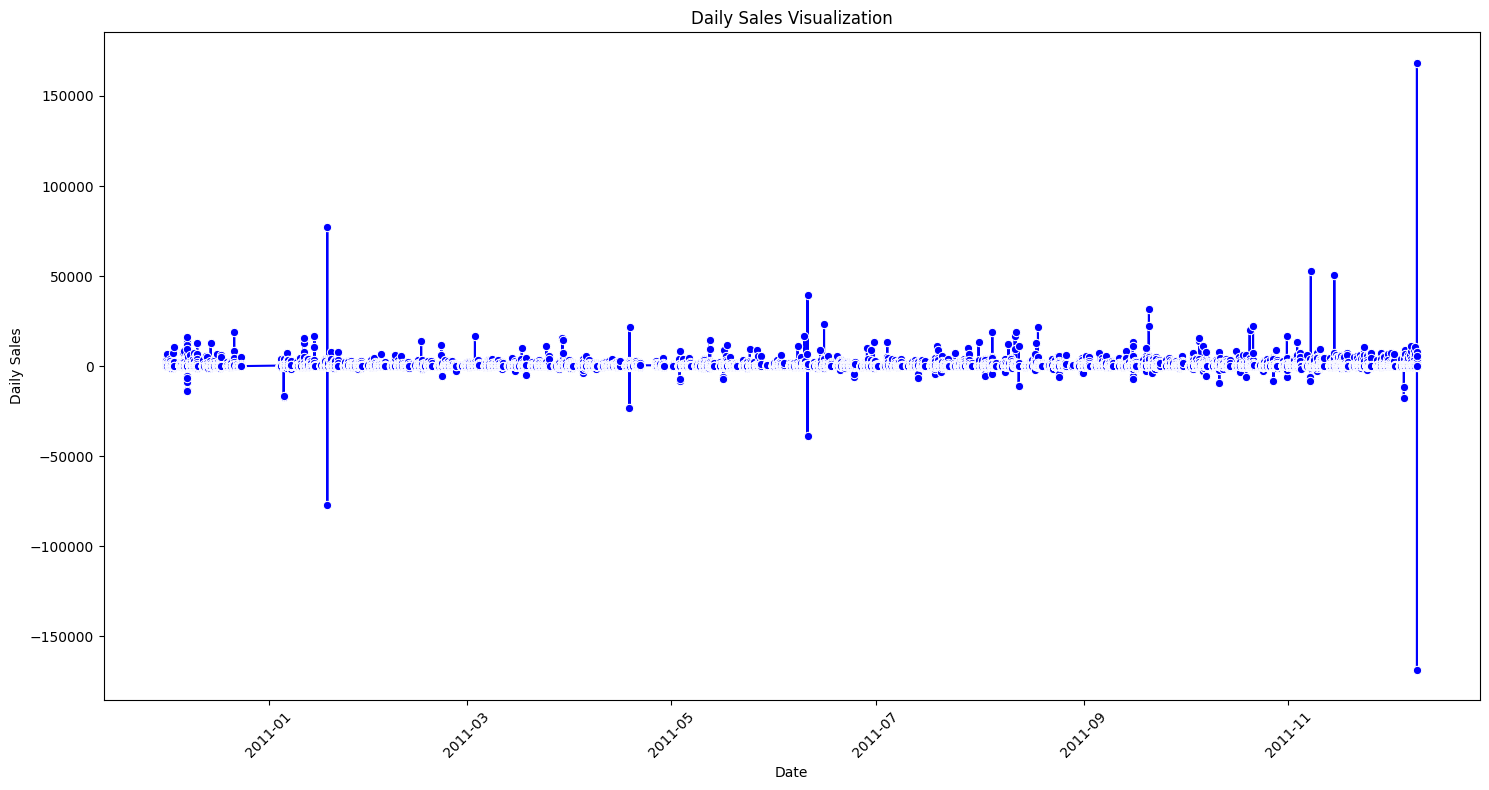

In [604]:
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum()

plt.figure(figsize=(15, 8))
sns.lineplot(data=daily_sales, marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.title('Daily Sales Visualization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
 8   TotalPrice   536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.9+ MB


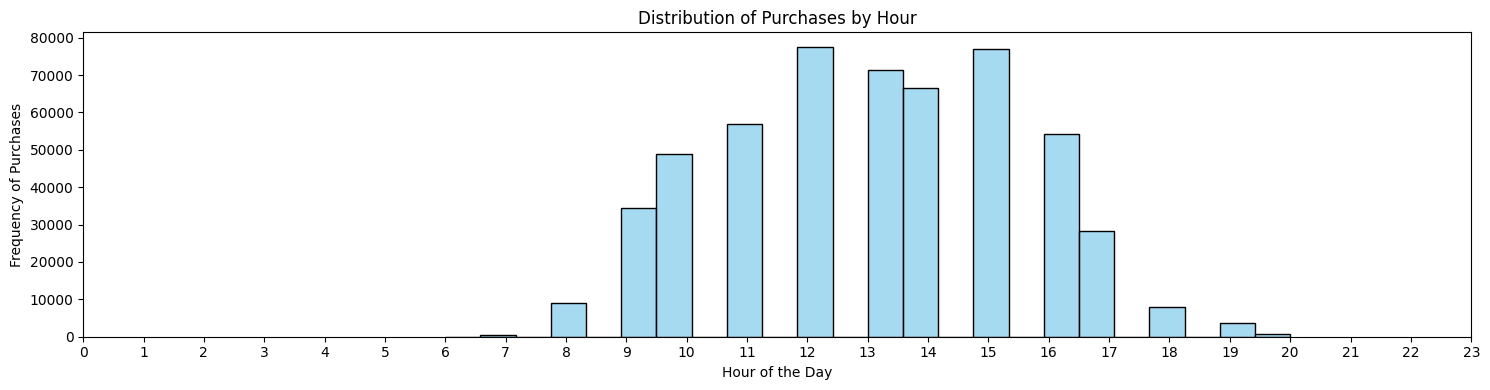

In [606]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%H:%M:%S')

plt.figure(figsize=(15, 4))
sns.histplot(data=df, x=df['InvoiceDate'].dt.hour, bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Purchases')
plt.title('Distribution of Purchases by Hour')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


In [607]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
 8   TotalPrice   536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.9+ MB


<ipython-input-609-83beed21a345>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='StockCode', y='Quantity', palette='viridis')


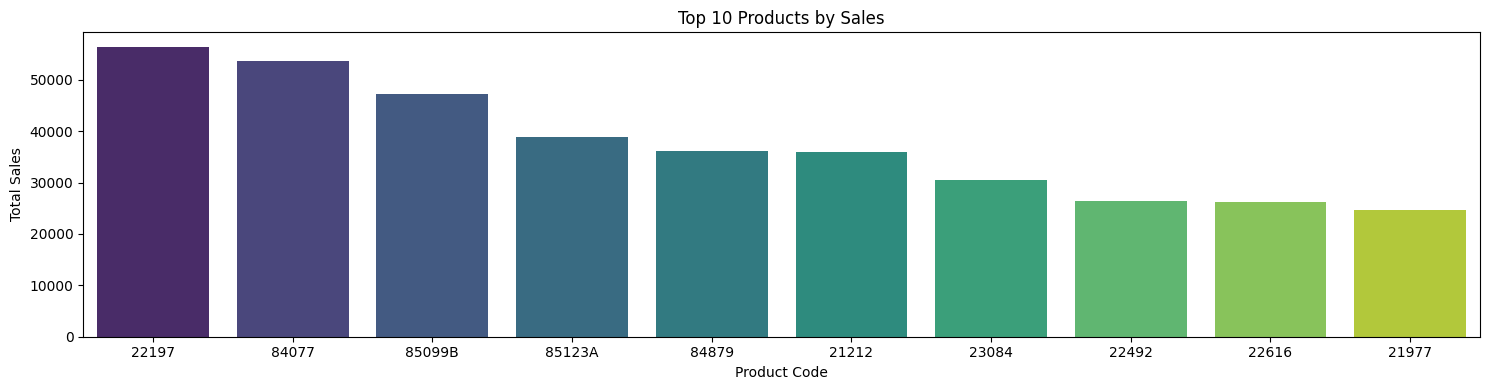

In [609]:
product_sales = df.groupby('StockCode')['Quantity'].sum().reset_index()

top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(15, 4))
sns.barplot(data=top_products, x='StockCode', y='Quantity', palette='viridis')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.tight_layout()
plt.show()

In [610]:
most_orders_country = df['Country'].value_counts().idxmax()

print("The country from which customers order the most:", most_orders_country)

The country from which customers order the most: United Kingdom


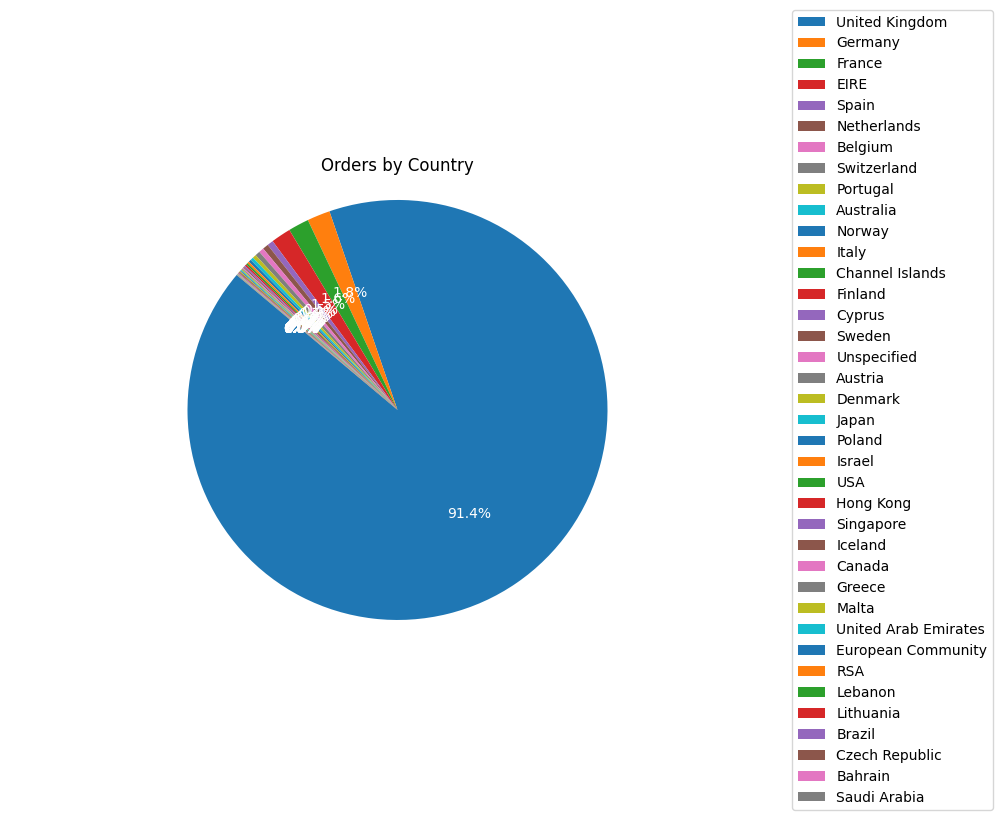

In [611]:
country_orders = df['Country'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(country_orders, labels=None, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})
plt.title('Orders by Country')
plt.legend(country_orders.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

In [612]:
df.dropna(inplace=True)
df.shape


(401604, 9)

In [613]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

RFM Metrics

In [614]:
today_date = df['InvoiceDate'].max() + pd.Timedelta(days=2)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40


In [615]:
rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,93.047118,5.075480,1893.531433
std,100.765435,9.338754,8218.696204
min,2.000000,1.000000,-4287.630000
25%,18.000000,1.000000,291.795000
50%,51.000000,3.000000,644.070000
75%,144.000000,5.000000,1608.335000
max,375.000000,248.000000,279489.020000


In [616]:
rfm = rfm[rfm["Monetary"] > 0]

rfm.describe()

,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4.322000e+03
mean,91.343591,5.115687,1.918498e+03
std,99.133565,9.384459,8.262490e+03
min,2.000000,1.000000,1.776357e-15
25%,18.000000,1.000000,3.005975e+02
50%,50.500000,3.000000,6.533250e+02
75%,139.000000,6.000000,1.624118e+03
max,375.000000,248.000000,2.794890e+05


In [617]:
rfm.loc[:, 'RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm.loc[:, 'FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm.loc[:, 'MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm.loc[:, 'RFM_SCORE'] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

<ipython-input-617-ec764292d40d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.loc[:, 'RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
<ipython-input-617-ec764292d40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.loc[:, 'FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
<ipython-input-617-ec764292d40d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,5,4,5,545
12348.0,76,4,1797.24,2,3,4,234
12349.0,20,1,1757.55,4,1,4,414
12350.0,311,1,334.40,1,1,2,112
12352.0,37,11,1545.41,3,5,4,354


In [618]:
highest_rfm_score = rfm['RFM_SCORE'].max()

print("Highest RFM Score:", highest_rfm_score)

lowest_rfm_score = rfm['RFM_SCORE'].min()

print("Lowest RFM Score:", lowest_rfm_score)


Highest RFM Score: 555
Lowest RFM Score: 111


In [619]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

segmentation_map = {
    r'[1-2][1-2]': 'Hibernated',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5|[3][1-2]': 'Potential',
    r'[3-4][3-5]': 'Active',
    r'[5][3-5]|[4-5][1-2]': 'Loyal'
}

rfm['Segment'] = rfm['Segment'].replace(segmentation_map, regex=True)

<ipython-input-619-8c3647909c4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
<ipython-input-619-8c3647909c4a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segmentation_map, regex=True)


In [620]:
rfm.head()


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12347.0,3,7,4310.00,5,4,5,545,Loyal
12348.0,76,4,1797.24,2,3,4,234,At_Risk
12349.0,20,1,1757.55,4,1,4,414,Loyal
12350.0,311,1,334.40,1,1,2,112,Hibernated
12352.0,37,11,1545.41,3,5,4,354,Active


In [621]:
rfm.shape

(4322, 8)

In [622]:
rfm['Segment'].value_counts()


Segment
Active        1149
Loyal         1087
Hibernated    1041
At_Risk        610
Potential      435
Name: count, dtype: int64

In [623]:
!pip install squarify


In [624]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4322 entries, 12347.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4322 non-null   int64   
 1   Frequency       4322 non-null   int64   
 2   Monetary        4322 non-null   float64 
 3   RecencyScore    4322 non-null   category
 4   FrequencyScore  4322 non-null   category
 5   MonetaryScore   4322 non-null   category
 6   RFM_SCORE       4322 non-null   object  
 7   Segment         4322 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 215.9+ KB


In [625]:
combined_df = pd.merge(df, rfm[['Recency', 'Frequency', 'Segment']], on='CustomerID', how='left')

combined_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,303.0,35.0,Potential
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,303.0,35.0,Potential
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential


In [626]:
combined_df.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
TotalPrice       0
Recency        303
Frequency      303
Segment        303
dtype: int64

In [627]:
combined_df.dropna(inplace=True)

In [628]:
combined_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Recency        0
Frequency      0
Segment        0
dtype: int64

In [629]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401301 entries, 0 to 401603
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401301 non-null  object        
 1   StockCode    401301 non-null  object        
 2   Description  401301 non-null  object        
 3   Quantity     401301 non-null  int64         
 4   InvoiceDate  401301 non-null  datetime64[ns]
 5   UnitPrice    401301 non-null  float64       
 6   CustomerID   401301 non-null  float64       
 7   Country      401301 non-null  object        
 8   TotalPrice   401301 non-null  float64       
 9   Recency      401301 non-null  float64       
 10  Frequency    401301 non-null  float64       
 11  Segment      401301 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 39.8+ MB


In [630]:
customer_total_purchase_count = combined_df.groupby('CustomerID')['InvoiceNo'].count().reset_index(name='TotalPurchaseCount')

combined_df = combined_df.merge(customer_total_purchase_count, on='CustomerID', how='left', suffixes=('', '_total'))


In [631]:
combined_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,Segment,TotalPurchaseCount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,303.0,35.0,Potential,309
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential,309
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,303.0,35.0,Potential,309
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential,309
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,303.0,35.0,Potential,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401296,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2.0,4.0,Loyal,52
401297,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2.0,4.0,Loyal,52
401298,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2.0,4.0,Loyal,52
401299,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2.0,4.0,Loyal,52


In [632]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401301 entries, 0 to 401300
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           401301 non-null  object        
 1   StockCode           401301 non-null  object        
 2   Description         401301 non-null  object        
 3   Quantity            401301 non-null  int64         
 4   InvoiceDate         401301 non-null  datetime64[ns]
 5   UnitPrice           401301 non-null  float64       
 6   CustomerID          401301 non-null  float64       
 7   Country             401301 non-null  object        
 8   TotalPrice          401301 non-null  float64       
 9   Recency             401301 non-null  float64       
 10  Frequency           401301 non-null  float64       
 11  Segment             401301 non-null  object        
 12  TotalPurchaseCount  401301 non-null  int64         
dtypes: datetime64[ns](1), float64

In [633]:
average_time_gap = combined_df.groupby('CustomerID')['Recency'].mean()

last_purchase_date = combined_df.groupby('CustomerID')['InvoiceDate'].max().dt.date

estimated_next_purchase_date = last_purchase_date + pd.to_timedelta(average_time_gap, unit='D')

customer_df = pd.DataFrame({
    'CustomerID': last_purchase_date.index,
    'Country': combined_df.groupby('CustomerID')['Country'].first(),
    'Segment': combined_df.groupby('CustomerID')['Segment'].first(),
    'Last_PurchaseDate': last_purchase_date.values,
    'Avg_TimeGap': average_time_gap.values,
    'Next_PurchaseDate': estimated_next_purchase_date.values
})

customer_df


<ipython-input-633-c7a4fa8288b8>:5: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  estimated_next_purchase_date = last_purchase_date + pd.to_timedelta(average_time_gap, unit='D')


,CustomerID,Country,Segment,Last_PurchaseDate,Avg_TimeGap,Next_PurchaseDate
CustomerID,,,,,,
12347.0,12347.0,Iceland,Loyal,2011-12-07,3.0,2011-12-10
12348.0,12348.0,Finland,At_Risk,2011-09-25,76.0,2011-12-10
12349.0,12349.0,Italy,Loyal,2011-11-21,20.0,2011-12-11
12350.0,12350.0,Norway,Hibernated,2011-02-02,311.0,2011-12-10
12352.0,12352.0,Norway,Active,2011-11-03,37.0,2011-12-10
...,...,...,...,...,...,...
18280.0,18280.0,United Kingdom,Hibernated,2011-03-07,279.0,2011-12-11
18281.0,18281.0,United Kingdom,Hibernated,2011-06-12,182.0,2011-12-11
18282.0,18282.0,United Kingdom,Loyal,2011-12-02,9.0,2011-12-11


In [634]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4322 entries, 12347.0 to 18287.0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4322 non-null   float64
 1   Country            4322 non-null   object 
 2   Segment            4322 non-null   object 
 3   Last_PurchaseDate  4322 non-null   object 
 4   Avg_TimeGap        4322 non-null   float64
 5   Next_PurchaseDate  4322 non-null   object 
dtypes: float64(2), object(4)
memory usage: 236.4+ KB


In [640]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert datetime columns to numerical features
customer_df['Last_PurchaseDate'] = pd.to_datetime(customer_df['Last_PurchaseDate']).astype(int)

# Label encode categorical features
label_encoder = LabelEncoder()
customer_df['Country'] = label_encoder.fit_transform(customer_df['Country'])
customer_df['Segment'] = label_encoder.fit_transform(customer_df['Segment'])

# Split the dataset into features (X) and target (y)
X = customer_df.drop(columns=['Next_PurchaseDate'])
y = customer_df['Next_PurchaseDate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 9.075344299050468e+26
Mean Absolute Error (MAE): 22845212306570.508
R-squared (R2): 0.5098255036944168
